# Session 3-- Functions & downloading

# Module 5-- Functions


- Module 5: Functions
    - Notes (Current page)
    - Video

- Module 6: Downloading
    - Notes
    - Video

# 1. Functions

- Function intro: [link](https://www.datacamp.com/community/tutorials/functions-python-tutorial)

## 1.1 Basic function

In [1]:
def num_print(a):
    return a

In [2]:
num_print(8)

8

## 1.2 Multiple arguments

In [3]:
def add_func(a,b,c):
    print('This function adds')
    final = a+b+c
    return final

In [4]:
add_func(10,20,10)

This function adds


40

In [5]:
def add_func(x,y,z):
    final = x+y+z
    return final

In [6]:
save = add_func(10,20,10)
save

40

## 1.3 Applied functions

### 1.3.A Import data

In [7]:
import pandas as pd
# Import data
url = 'https://www.macrohistory.net/app/download/9834512569/JSTdatasetR5.xlsx?t=1641215586'
df = pd.read_excel(url, sheet_name=1)
df.head(2)

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.0,3273.239437,13.836157,21.449734,208.78,0.109266,...,-0.070045,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.0,3298.507463,13.936864,19.930801,211.56,0.104579,...,0.041654,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN


### 1.3.1 Subset column
<img src="Screenshots/subset_col.png" width=500 length=500 />

In [8]:
def sub_col(data_frame, col):
    final = data_frame.loc[:, col]
    return final

In [9]:
df_sub = sub_col(df, ['country','pop'])
df_sub.head(2)

,country,pop
0,Australia,1775.0
1,Australia,1675.0


### 1.3.2 Subset row

<img src="Screenshots/subset_row.svg" width=500 length=500 />


In [10]:
df.country.unique()

array(['Australia', 'Belgium', 'Canada', 'Switzerland', 'Germany',
       'Denmark', 'Spain', 'Finland', 'France', 'UK', 'Ireland', 'Italy',
       'Japan', 'Netherlands', 'Norway', 'Portugal', 'Sweden', 'USA'],
      dtype=object)

In [11]:
def sub_country(data_frame, country):
    mask = data_frame['country'] == country
    res = df.loc[mask, ['country','year','pop']]
    return res

In [12]:
df_bel = sub_country(df, 'Belgium')
df_bel.head(2)

,country,year,pop
148,Belgium,1870,5096.0
149,Belgium,1871,5137.0


## 1.4 Subset data and pivot table

In [13]:
def sub_pivot(data, countries):
    country_list = countries
    mask = data.country.isin(country_list) 
    res = data.loc[mask, ['country','pop','year']]
    res = res.pivot_table(columns='country',index='year', values='pop')
    return res

In [14]:
sub_pivot(df, ['Belgium','France']).head(2)

country,Belgium,France
year,,
1870,5096.0,38440.0
1871,5137.0,37731.0


## 1.5 Show basic info

In [15]:
def basics(data):
    print('Head')
    print(data.head(2))
    print('')
    print('Tail')
    print(data.tail(2))
    print('')
    print('Columns')
    print(data.columns[:3])
    print('')
    print('Info')
    print(data.info())

In [16]:
basics(df_sub)

Head
     country     pop
0  Australia  1775.0
1  Australia  1675.0

Tail
     country            pop
2662     USA  322705.239927
2663     USA  324802.861426

Columns
Index(['country', 'pop'], dtype='object')

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  2664 non-null   object 
 1   pop      2613 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.8+ KB
None


## 1.6 Groupby and plot

In [17]:
df.head(2)

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.0,3273.239437,13.836157,21.449734,208.78,0.109266,...,-0.070045,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.0,3298.507463,13.936864,19.930801,211.56,0.104579,...,0.041654,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN


In [18]:
def groupby_year(d, column_name, plot=False):
    res = d.groupby('year')[column_name].sum()
    if plot==True:
        res.plot()
    else:
        return res

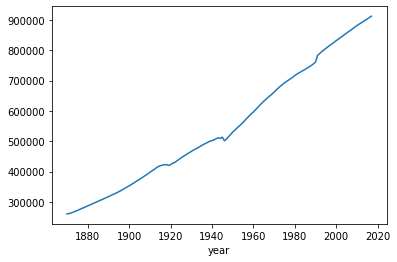

In [19]:
groupby_year(df, 'pop', True)

# 2. For loops

## 2.1 For loop with list

In [20]:
for country in ['France', 'Italy']:
    print(country)

France
Italy


In [21]:
for country in ['France', 'Italy']:
    print(country + '_up')

France_up
Italy_up


In [22]:
country_list = df.country.unique()[:4]
for c in country_list:
    print(c)

Australia
Belgium
Canada
Switzerland


## 2.2 Apply to pandas

In [23]:
for country_name in country_list:
    mask = (df.country == country_name) & (df.year == 2000)
    res = df.loc[mask, ['country','pop']]
    print(res)
    print('')

       country      pop
130  Australia  19053.0

     country      pop
278  Belgium  10263.0

    country      pop
426  Canada  31100.0

         country      pop
574  Switzerland  7266.92



## 2.3 Plot

In [24]:
import matplotlib.pyplot as plt

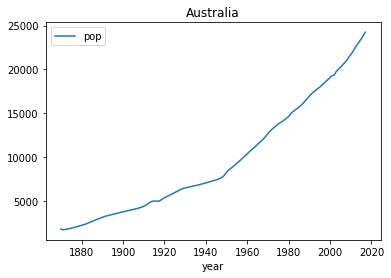

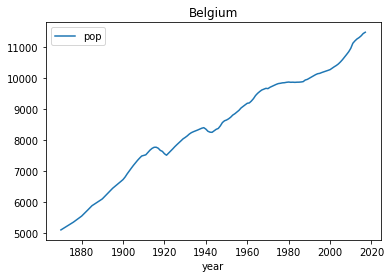

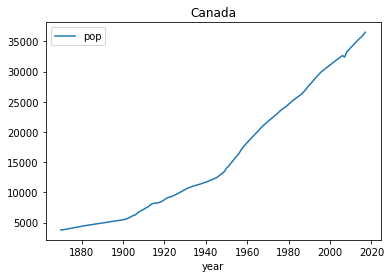

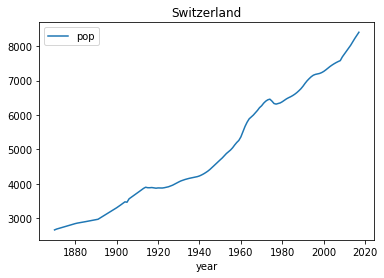

In [25]:
for country_name in country_list:
    mask = (df.country == country_name) 
    res = df.loc[mask, ['country','year','pop']]
    res = res.set_index('year')
    res.plot()
    plt.title(country_name)

## 2.4 For loop with dictionary

In [26]:
country_dict = {'Australia':'English', 
 'Belgium' : 'French', 
 'Canada':'English', 
 'Switzerland' : 'Italian'}

In [27]:
for country, lan in country_dict.items():
    print(country, lan)

Australia English
Belgium French
Canada English
Switzerland Italian


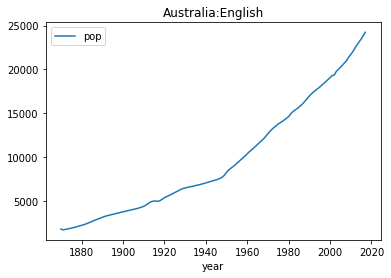

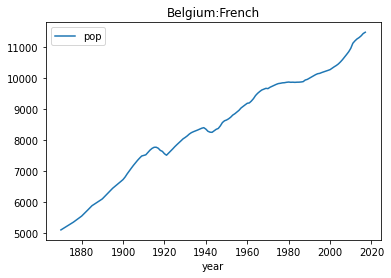

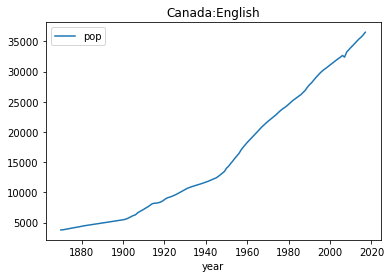

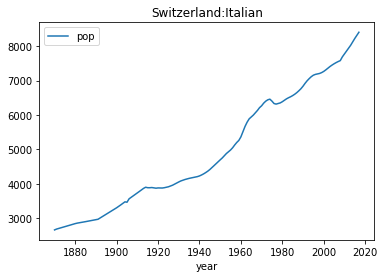

In [28]:
for country, lan in country_dict.items():
    mask = (df.country == country) 
    res = df.loc[mask, ['country','year','pop']]
    res = res.set_index('year')
    res.plot()
    plt.title(country + ':' + lan)

## 2.5 For loop with local files

In [29]:
import os
os.listdir('Input/')

['Detroit_Metro_Area.xlsx',
 '.DS_Store',
 'CA.xlsx',
 'Boston_Metro_Area.xlsx',
 'Folders']

In [30]:
files = ['Detroit_Metro_Area.xlsx',
         'CA.xlsx', 
         'Boston_Metro_Area.xlsx',]

In [31]:
dfs = []
for file in files:
    file_name = 'Input/' + file 
    data = pd.read_excel(file_name)
    data['NEW_column'] = file
    dfs.append(data)
df_final = pd.concat(dfs, axis=0)
df_final.head(2)

,Select characteristics,Total,Occupied without rent,Last month’s payment status,Unnamed: 4,Unnamed: 5,Unnamed: 6,Did not report to tenure,NEW_column
0,NaN,Unnamed: 1_level_1,Unnamed: 2_level_1,Yes,No,Rent was deferred,Did not report,Unnamed: 7_level_1,Detroit_Metro_Area.xlsx
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detroit_Metro_Area.xlsx


# 3. If -- else

## 3.A Basic

In [32]:
x = 3
if x>4:
    print('X is big')
else:
    print('X is small')

X is small


## 3.1 Use with function

In [33]:
def num_check(number):
    if number>100:
        print('This number is big')
    if number<1:
        print('This number is too small to be a real number')

In [34]:
num_check(.5)

This number is too small to be a real number


In [35]:
num_check(200)

This number is big


## 3.2 Use with pandas

In [36]:
for country in df.country.unique():
    if 'A' in country:
        print(country)

Australia
USA


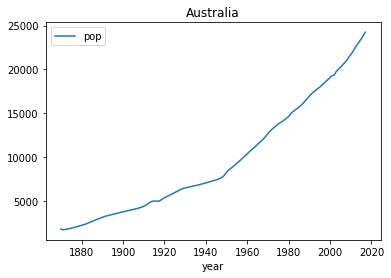

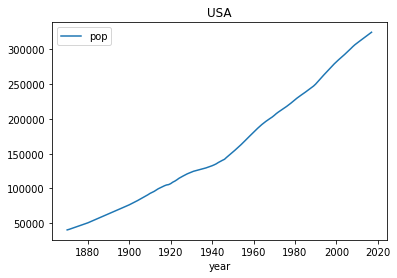

In [37]:
for country_name in df.country.unique():
    if 'A' in country_name:
        mask = (df.country == country_name) 
        res = df.loc[mask, ['country','year','pop']]
        res = res.set_index('year')
        res.plot()
        plt.title(country_name)